In [142]:
import pandas as pd
import numpy as np
import seaborn as sns

In [143]:
No_Scaling = pd.read_excel("scripts/new_results/Unnormalized.xlsx")
Min_Max = pd.read_excel("scripts/new_results/MinMax Scaler.xlsx")
Quantile_Transformer = pd.read_excel("scripts/new_results/Quantile Transformer.xlsx")
Robust_Scaler = pd.read_excel("scripts/new_results/Robust Scaler.xlsx")
Standard_Scaler = pd.read_excel("scripts/new_results/Standard Scaler.xlsx")
Max_Abs_Scaler = pd.read_excel("scripts/new_results/MaxAbs Scaler.xlsx")

In [144]:
No_Scaling

,Classifier Model,Accuracy,F1-Score,Recall,Precision,Jaccard-Score,Kappa-Score,Weighted_Score
0,LightGBM,0.956113,0.955579,0.956113,0.955474,0.917240,0.878340,5.618859
1,XG Boost,0.954545,0.954447,0.954545,0.954673,0.915043,0.876473,5.609727
2,Random Forest,0.937304,0.937333,0.937304,0.937640,0.886689,0.830066,5.466335
3,Decision Tree,0.920063,0.919440,0.920063,0.919128,0.856880,0.780942,5.316515
4,Ada Boost,0.887147,0.892220,0.887147,0.903748,0.812308,0.718445,5.101017
5,Gradient Boost,0.882445,0.889479,0.882445,0.912306,0.806718,0.722956,5.096349
6,K-Nearest Neighbors,0.835423,0.846457,0.835423,0.870668,0.745567,0.608774,4.742312
7,Support Vector Machine(RBF),0.804075,0.821502,0.804075,0.869229,0.708954,0.571469,4.579306
8,Support Vector Machine(Poly),0.794671,0.814420,0.794671,0.865756,0.700941,0.554170,4.524628
9,Support Vector Machine(Linear),0.786834,0.808564,0.786834,0.862020,0.695804,0.538274,4.478329


In [145]:
No_Scaling.sort_values('Classifier Model', axis = 0)
Min_Max.sort_values('Classifier Model', axis = 0)
Quantile_Transformer.sort_values('Classifier Model', axis = 0)
Robust_Scaler.sort_values('Classifier Model', axis = 0)
Standard_Scaler.sort_values('Classifier Model', axis = 0)
Max_Abs_Scaler.sort_values('Classifier Model', axis = 0)

,Classifier Model,Accuracy,F1-Score,Recall,Precision,Jaccard-Score,Kappa-Score,Weighted_Score
4,Ada Boost,0.887147,0.892220,0.887147,0.903748,0.812308,0.718445,5.101017
3,Decision Tree,0.910658,0.909699,0.910658,0.909049,0.842277,0.753761,5.236103
5,Gradient Boost,0.882445,0.889479,0.882445,0.912306,0.806718,0.722956,5.096349
7,K-Nearest Neighbors,0.858934,0.869158,0.858934,0.894372,0.778814,0.667316,4.927528
0,LightGBM,0.956113,0.955579,0.956113,0.955474,0.917240,0.878340,5.618859
9,Logistic Regression,0.807210,0.825746,0.807210,0.875803,0.716173,0.579433,4.611576
11,Naive Bayes,0.700627,0.734094,0.700627,0.859323,0.590252,0.434523,4.019446
2,Random Forest,0.937304,0.937099,0.937304,0.937245,0.886376,0.829167,5.464496
10,Support Vector Machine(Linear),0.804075,0.824320,0.804075,0.879172,0.714991,0.577206,4.603840
6,Support Vector Machine(Poly),0.865204,0.876665,0.865204,0.909276,0.789022,0.688791,4.994161


In [146]:
Model_Shortforms = {"Random Forest":"RF", "Decision Tree":"DF", "Gradient Boost":"GB","Ada Boost":"AB", "Logistic Regression":"LR","Support Vector Machine(Linear)":"S(L)","Support Vector Machine(Poly)":"S(P)","Support Vector Machine(RBF)":"S(RBF)","Support Vector Machine(Sigmoid)":"S(S)","K-Nearest Neighbors":"K","Naive Bayes":"NB","LightGBM":"LGMB","XG Boost":"XGB"}

In [147]:
No_Scaling = No_Scaling.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())
Min_Max = Min_Max.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())
Standard_Scaler = Standard_Scaler.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())
Robust_Scaler = Robust_Scaler.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())
Quantile_Transformer = Quantile_Transformer.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())
Max_Abs_Scaler = Max_Abs_Scaler.replace(to_replace = Model_Shortforms.keys(), value = Model_Shortforms.values())

In [148]:
Accuracy_Accumulated = pd.DataFrame()
Accuracy_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
Accuracy_Accumulated["Unscaled"] = No_Scaling["Accuracy"]
Accuracy_Accumulated["Min_Max"] = Min_Max["Accuracy"]
Accuracy_Accumulated["Standard_Scaler"] = Standard_Scaler["Accuracy"]
Accuracy_Accumulated['Quantile_Transformer'] = Quantile_Transformer["Accuracy"]
Accuracy_Accumulated["Robust_Scaler"] = Robust_Scaler["Accuracy"]
Accuracy_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["Accuracy"]

In [149]:
F1_Score_Accumulated = pd.DataFrame()
F1_Score_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
F1_Score_Accumulated["Unscaled"] = No_Scaling["F1-Score"]
F1_Score_Accumulated["Min_Max"] = Min_Max["F1-Score"]
F1_Score_Accumulated["Standard_Scaler"] = Standard_Scaler["F1-Score"]
F1_Score_Accumulated['Quantile_Transformer'] = Quantile_Transformer["F1-Score"]
F1_Score_Accumulated["Robust_Scaler"] = Robust_Scaler["F1-Score"]
F1_Score_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["F1-Score"]

In [150]:
Recall_Accumulated = pd.DataFrame()
Recall_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
Recall_Accumulated["Unscaled"] = No_Scaling["Recall"]
Recall_Accumulated["Min_Max"] = Min_Max["Recall"]
Recall_Accumulated["Standard_Scaler"] = Standard_Scaler["Recall"]
Recall_Accumulated['Quantile_Transformer'] = Quantile_Transformer["Recall"]
Recall_Accumulated["Robust_Scaler"] = Robust_Scaler["Recall"]
Recall_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["Recall"]

In [151]:
Precision_Accumulated = pd.DataFrame()
Precision_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
Precision_Accumulated["Unscaled"] = No_Scaling["Precision"]
Precision_Accumulated["Min_Max"] = Min_Max["Precision"]
Precision_Accumulated["Standard_Scaler"] = Standard_Scaler["Precision"]
Precision_Accumulated['Quantile_Transformer'] = Quantile_Transformer["Precision"]
Precision_Accumulated["Robust_Scaler"] = Robust_Scaler["Precision"]
Precision_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["Precision"]

In [152]:
Jaccard_Score_Accumulated = pd.DataFrame()
Jaccard_Score_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
Jaccard_Score_Accumulated["Unscaled"] = No_Scaling["Jaccard-Score"]
Jaccard_Score_Accumulated["Min_Max"] = Min_Max["Jaccard-Score"]
Jaccard_Score_Accumulated["Standard_Scaler"] = Standard_Scaler["Jaccard-Score"]
Jaccard_Score_Accumulated['Quantile_Transformer'] = Quantile_Transformer["Jaccard-Score"]
Jaccard_Score_Accumulated["Robust_Scaler"] = Robust_Scaler["Jaccard-Score"]
Jaccard_Score_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["Jaccard-Score"]

In [153]:
Kappa_Score_Accumulated = pd.DataFrame()
Kappa_Score_Accumulated["Classifier Model"] = No_Scaling["Classifier Model"]
Kappa_Score_Accumulated["Unscaled"] = No_Scaling["Kappa-Score"]
Kappa_Score_Accumulated["Min_Max"] = Min_Max["Kappa-Score"]
Kappa_Score_Accumulated["Standard_Scaler"] = Standard_Scaler["Kappa-Score"]
Kappa_Score_Accumulated['Quantile_Transformer'] = Quantile_Transformer["Kappa-Score"]
Kappa_Score_Accumulated["Robust_Scaler"] = Robust_Scaler["Kappa-Score"]
Kappa_Score_Accumulated["Max_Abs_Scaler"] = Max_Abs_Scaler["Kappa-Score"]

In [154]:
Accuracy_Accumulated = pd.melt(Accuracy_Accumulated, ['Classifier Model'])
F1_Score_Accumulated = pd.melt(F1_Score_Accumulated, ['Classifier Model'])
Recall_Accumulated = pd.melt(Recall_Accumulated, ['Classifier Model'])
Precision_Accumulated = pd.melt(Precision_Accumulated, ['Classifier Model'])
Jaccard_Score_Accumulated = pd.melt(Jaccard_Score_Accumulated, ['Classifier Model'])
Kappa_Score_Accumulated = pd.melt(Kappa_Score_Accumulated, ['Classifier Model'])

<Axes: xlabel='Classifier Model', ylabel='value'>

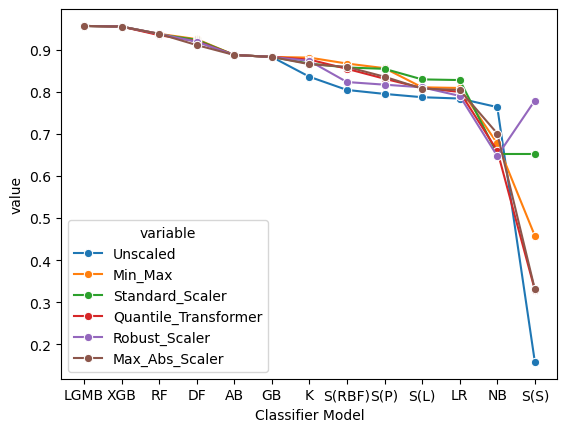

In [155]:
sns.lineplot(data = Accuracy_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')

<Axes: xlabel='Classifier Model', ylabel='value'>

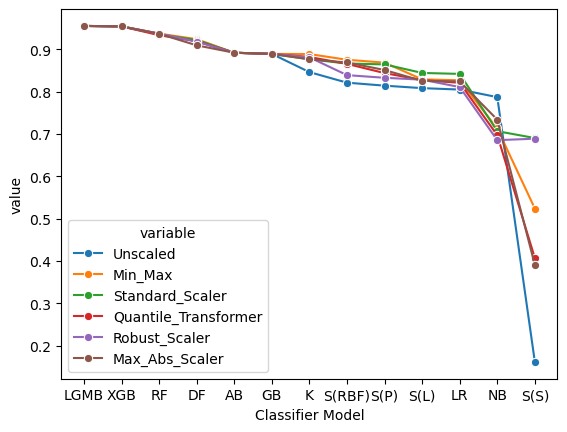

In [156]:
sns.lineplot(data = F1_Score_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')

<Axes: xlabel='Classifier Model', ylabel='value'>

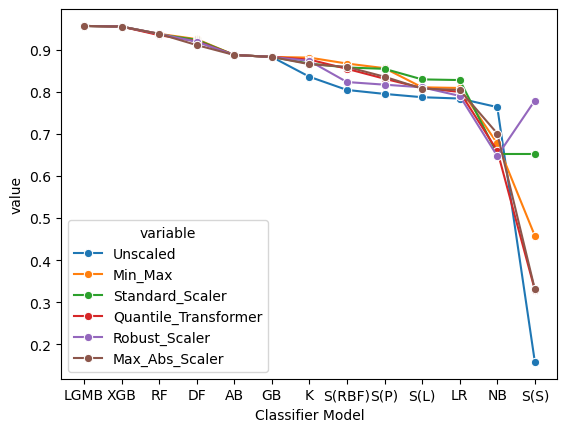

In [157]:
sns.lineplot(data = Recall_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')

<Axes: xlabel='Classifier Model', ylabel='value'>

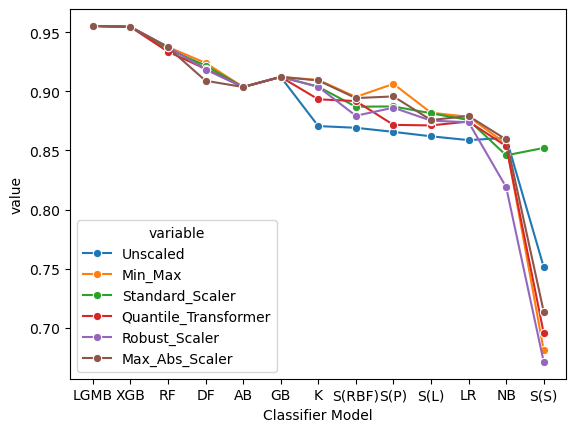

In [158]:
sns.lineplot(data = Precision_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')

<Axes: xlabel='Classifier Model', ylabel='value'>

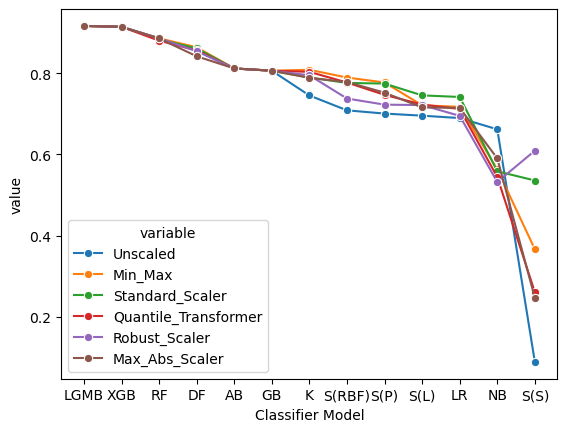

In [159]:
sns.lineplot(data = Jaccard_Score_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')

<Axes: xlabel='Classifier Model', ylabel='value'>

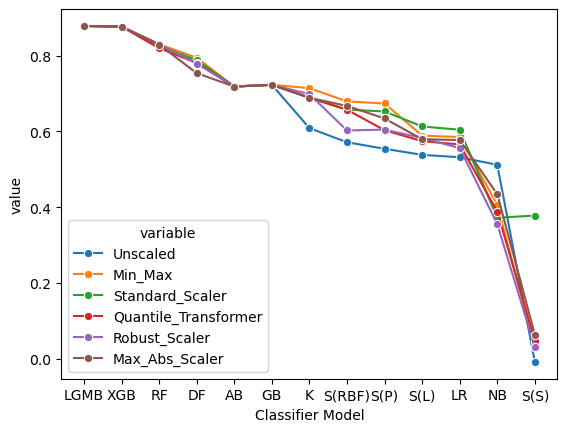

In [160]:
sns.lineplot(data = Kappa_Score_Accumulated, x = "Classifier Model", y = 'value', hue = 'variable', marker= 'o')